Gráfico gerado após a conversão:


<IPython.core.display.Javascript object>


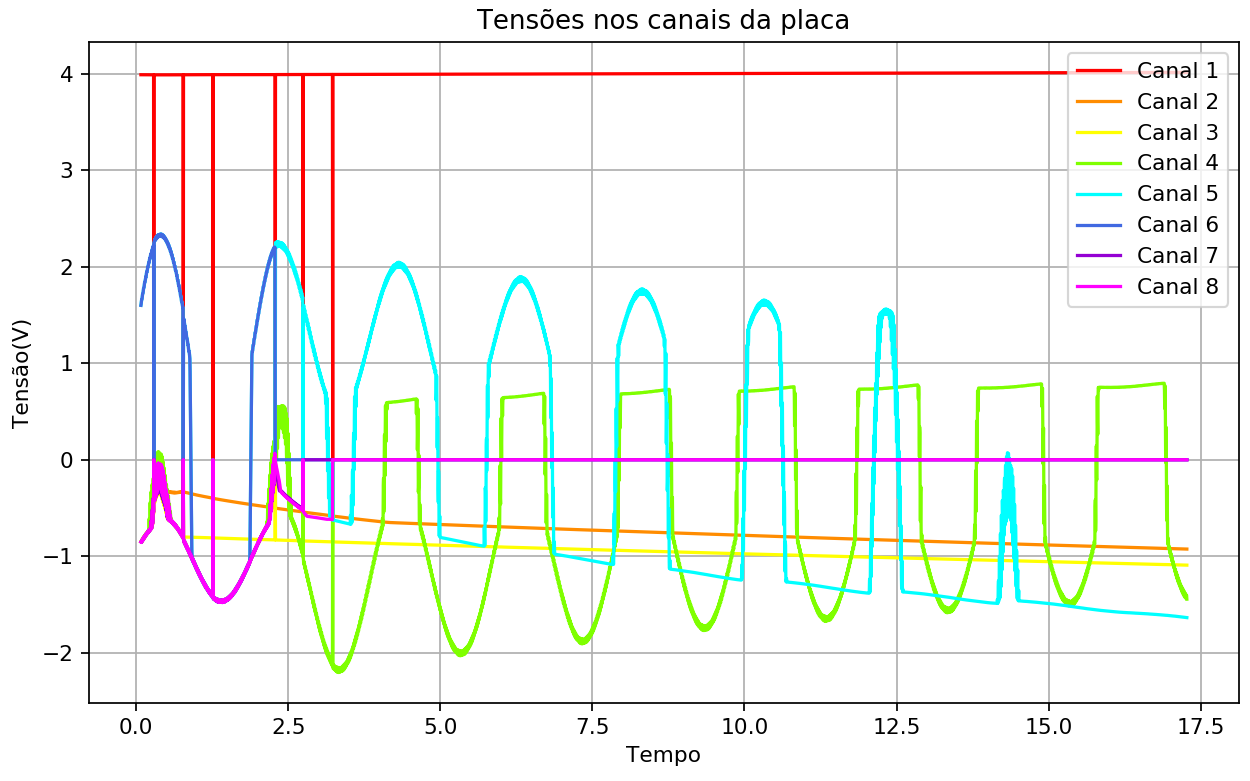

In [46]:
#Importando as bibliotecas numéricas e de plotagem; struct foi importado para realizar operações
#entre tipos de dados diferentes.
#%matplotlib notebook permite gráfico interativo, para ver valores

import numpy as np #funções numéricas
import matplotlib.pyplot as plt #funções de plotagem
%matplotlib notebook 
import struct #funções de conversão dos dados binários

#Gerando a matriz com os dados, á partir do arquivo de texto gerado na placa Cyton
#Parâmetros:
    #dtype = string para ser posteriormente convertido em seu valor hexadecimal e então para float
    #delimiter para remover as vírgulas do arquivo de texto; são os separadores
    #usecols para selecionar somente as 8 colunas que correspondem aos 8 canais de tensão da placa
    #pode ser alterado o usecols se quiser obter os dados do acelerômetro, são os últimos 3 valores(x,y,z)
    #para as colunas [10,11,12] os valores do acelerômetro, a 50Hz.
    #skipfooter para pular o rodapé, com informações além dos dados, o que interfere na utilização da função;
    #algumas das últimas linhas podem acabar com menos elementos que 8, portanto foram removidas algumas linhas além do rodapé    
    #missing_values e filling_values preenchem elementos em que houve algum erro e não teve registro

#laço for foi utilizado para automatizar a geração dos gráficos; foi formatado para aceitar arquivos
#nomeados automaticamente

for i in range (101,102): #pode ser alterado dependendo do número de arquivos
    arquivo_txt = "txts ("+str(i)+").txt" #pode ser alterado, para nomes em padrão
    #print(arquivo_txt)
    datahex = np.genfromtxt(arquivo_txt, dtype=str,delimiter=',',usecols=np.arange(1,9), skip_footer = 13, filling_values = '8000000',missing_values = '8000000', invalid_raise = True)
    nome_arq_texto = arquivo_txt.split('.') #determinando o nome da imagem .png 
    nome_arq_texto = nome_arq_texto[0]
    #print(nome_arq_texto)

    #.shape para obter as dimensões de data, para então ser utilizado para uma varredura abaixo
    #.shape do texto em hexadecimal atribuído a uma variável
    #irá transformar os valores de hexadecimal para decimal, float
    
    len(datahex)
    a = datahex.shape
#     print(datahex)
#     print(a)

    #data2 é inicialmente um vetor de zeros, com as mesmas dimensões de datahex
    #com o vetor de zeros, é possível aceitar valores float, que serão gerados na divisão
    #pelo fator de escala, definido no site OpenBCI, seção de Data Format
    
    data2 = np.zeros(len(datahex)*8,dtype=np.dtype('float32')).reshape(a[0],a[1])
    
    #É então feita a conversão dos valores de 24-bits big endian para 32-bits big endian
    for i in range(0,a[0]): #repete para todas as linhas de datahex
        for j in range(0,a[1]): #repete para todas as colunas de datahex

    #bytearray.fromhex irá converter o array de hex para um array de bytes
    #3B indica que são 3 bytes, 3x8 = 24 bits de informação, separado em um array com cada byte
    #como elemento. 

            bytetext =  bytearray.fromhex(datahex[i,j])
            unpacked = struct.unpack('3B',bytetext)
            
    #        print(unpacked)
            #Determinando o sinal, analisando o primeiro byte á esquerda dos 3 bytes (24 bits)
            #para determinar o prefixo a ser adicionado à esquerda ao converter para 32 bits.
            
            if(unpacked[0]>127):
                pre_fix = bytes(bytearray.fromhex('FF'))
            else:
                pre_fix = bytes(bytearray.fromhex('00'))
                bytetext = pre_fix + bytetext
            #print(bytetext)
            

    #Scale Factor (Volts/count) = 4.5 Volts / gain / (2^23 - 1);
    #Obtido experimentalmente, o cálculo é fornecido pelo site da OpenBCI.
    #Deve alterar o ganho dependendo de qual for utilizado na placa.
    #Valor em volts do dado após ser convertido com a escala.
    #int.from_bytes converte o 'bytetext' de acordo com os parâmetros,
    #neste caso big endian e signed

            gain = 24
            scaleFF = (4.5/gain)*(2**23-1)
            bytetextInt = int.from_bytes(bytetext,byteorder='big',signed = True)
            data2[i,j] = bytetextInt/scaleFF
            #print(data2[i,j])
    #        print(data2)

    #Simulação do tempo, com frequência travada em 250Hz.
    #geração de vetor espaçado uniformemente com np.arange, de 0 a len(data2)*dt, passo dt
    freq = 250
    dt = 1/freq
    t = np.arange(0,len(data2)*dt,dt)
#     print(t)
#     print(t.shape)
#     print(data2.shape)

    #Fazendo a plotagem obtidas pelos dados, dos canais.
    #figsize para tornar a figura maior, mais adequado para visualizar os dados.
    #savefig salva os arquivos automaticamente, pode ser útil para múltiplas aquisições.
    print('Gráfico gerado após a conversão:')
    plt.figure(figsize = (8,5))

    plt.plot(t[20:],data2[20:,0],'red',label = 'Canal 1')
    plt.plot(t[20:],data2[20:,1],'darkorange',label = 'Canal 2')
    plt.plot(t[20:],data2[20:,2],'yellow',label = 'Canal 3')
    plt.plot(t[20:],data2[20:,3],'chartreuse',label = 'Canal 4')
    plt.plot(t[20:],data2[20:,4],'aqua',label = 'Canal 5')
    plt.plot(t[20:],data2[20:,5],'royalblue',label = 'Canal 6')
    plt.plot(t[20:],data2[20:,6],'darkviolet',label = 'Canal 7')
    plt.plot(t[20:],data2[20:,7],'fuchsia',label = 'Canal 8')
    plt.legend(loc='best')
    plt.show
    plt.title("Tensões nos canais da placa")
    plt.xlabel('Tempo')
    plt.ylabel('Tensão(V)')
    plt.tight_layout(.5)
    plt.grid(True)
    plt.savefig(nome_arq_texto)
    plt.savefig('imagem_aquisicao.png')
    plt.show()


<IPython.core.display.Javascript object>


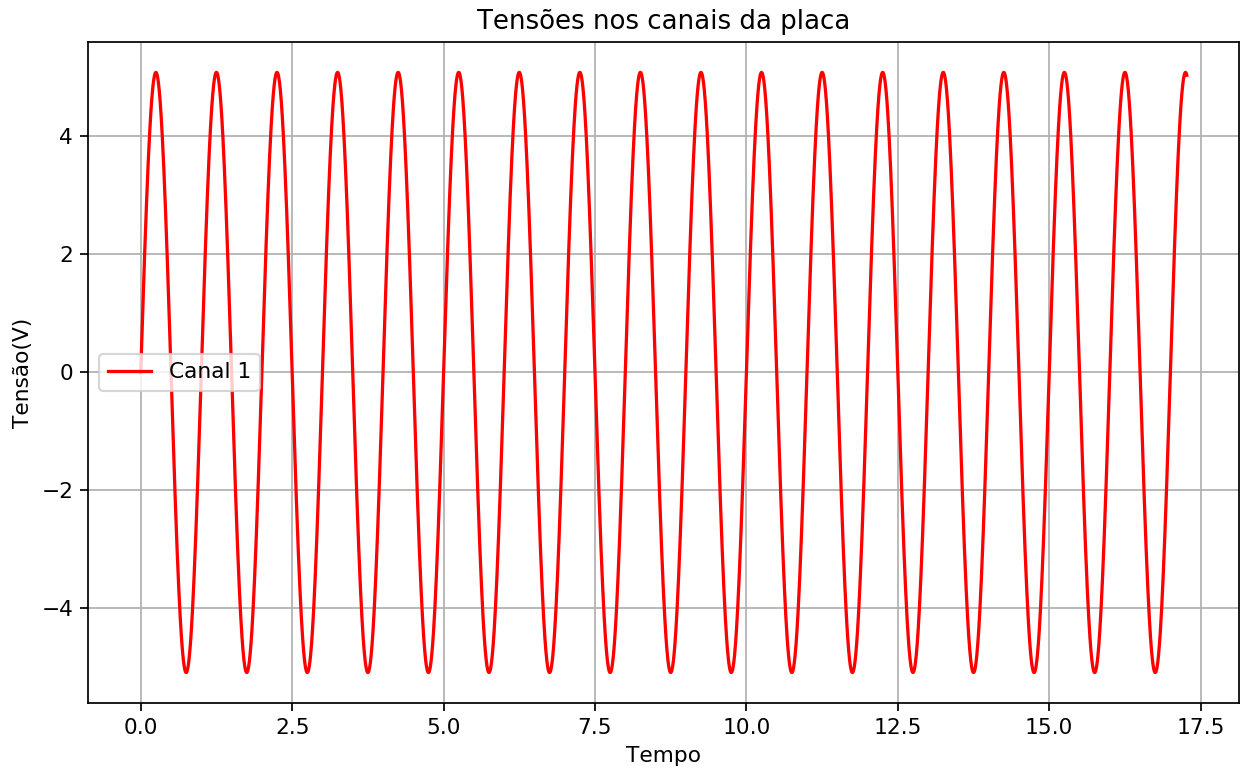

In [47]:
#Simulação realizada com senóide criada artificialmente.
#24-bits signed vai de -8388608 a +8388607, como será simulado um de 32-bits, deve ser
#contido a estes valores, foi aproximado para 8000000

import matplotlib.pyplot as plt
import numpy as np
Fs = 250 #sample rate
f = 1 #freq. do sinal
sample = 4319
x = np.arange(sample)
yInt = np.arange(sample,dtype = '>i4')
y = np.sin(2 * np.pi * f * x / Fs)*8000000
#print(y.shape)
for i in range(0,y.shape[0]):
    yInt[i] = int(y[i])
aaa = np.array(yInt,dtype = np.int32)
aaa = aaa/1572863.8125
plt.figure(figsize = (8,5))
plt.plot(t[:],aaa[:],'red',label = 'Canal 1')
plt.legend(loc='best')
plt.show
plt.title("Tensões nos canais da placa")
plt.xlabel('Tempo')
plt.ylabel('Tensão(V)')
plt.tight_layout(.5)
plt.grid(True)
plt.savefig(nome_arq_texto)
plt.savefig('tensao_simulada.png')
plt.show()


In [49]:
#função para converter valores signed inteiros para hexadecimal
#<< move os bits de 1 pelo valor nbits, 1 << nbits é equivalente a multiplicar val por 2**nbits
#% realiza operação em bits de AND, quando ambos forem 1, será 1 o resultado no bit correspondente
#val+(1<<nbits) é um valor superior ao limite de 24 bits, o sinal é mantido para complemento de 2
#após ser utilizado o AND, remove o valor limite do resultado, restando o valor.
def tohex(val, nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))

#iniciando array de strings
yhexa = ['' for x in range(sample)]
#foram feitas as conversões de int para 24-bits signed com a função tohex, removidos '0x' das strings
#os ifs foram adicionados para corrigir certos valores, como '0' para '000000' e
#adicionar um '0' á esquerda para os valores com apenas 5 dígitos.
for i in range(0,yInt.shape[0]): #repete para todas as linhas de datahex
    #for j in range(0,a[1]): #repete para todas as colunas de datahex
        hext = tohex(yInt[i],24) 
        yhexa[i] = hext[:]
        yhexaspl = list(yhexa[i]) 
        yhexa[i] = ''.join(yhexaspl[2:])
        yhexaspl = list(yhexa[i]) 
        if yhexa[i] == '0':
            yhexa[i] = '000000'
        if len(yhexaspl) == 5:          
            yhexa[i] = ''.join(['0']+yhexaspl[:])
         
np.savetxt('texto_teste.txt',yhexa,fmt ='%s', delimiter = ',')       
#print(yhexa)

Gráfico gerado após a conversão:


<IPython.core.display.Javascript object>


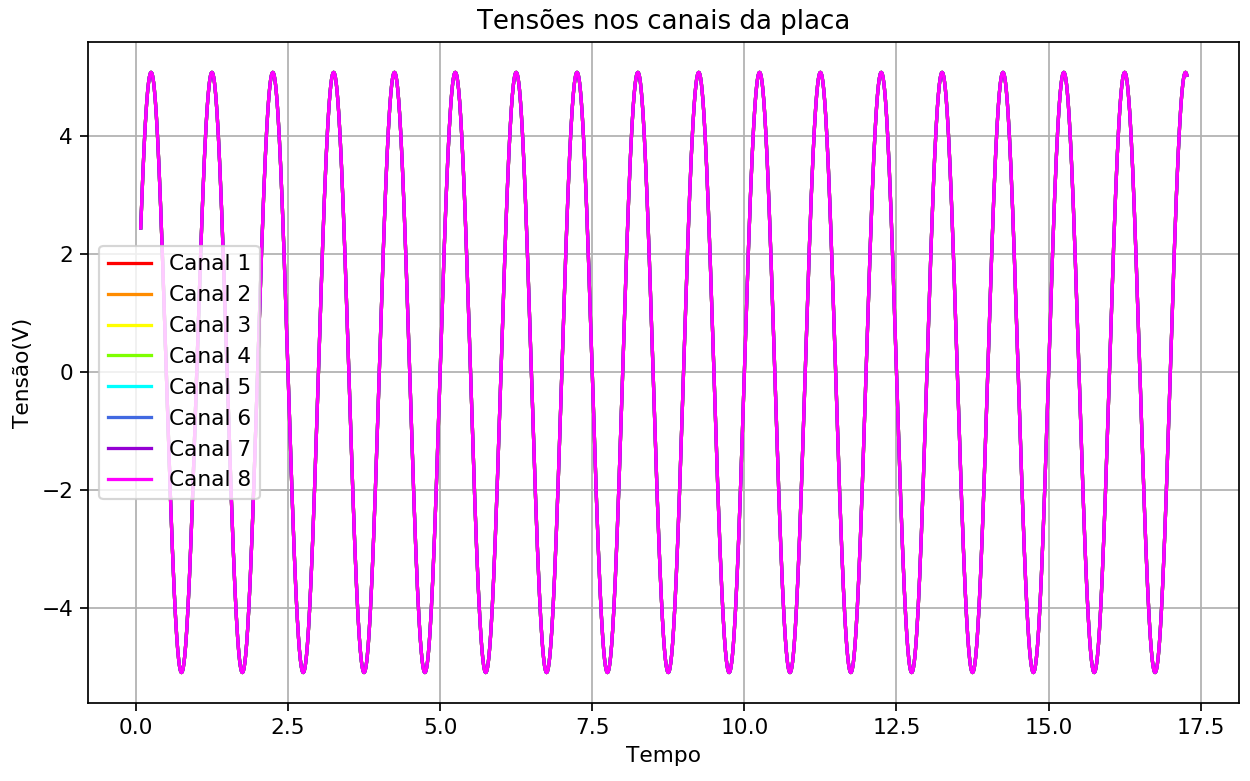

In [50]:
#arrayteste é o array montado à partir do arquivo de texto de saída do simulador de senóide acima
#dtype=str apra aceitar strings, separados por vírgulas
arrayteste = np.genfromtxt('texto_teste.txt',dtype=str, delimiter = ',') 

data2 = np.zeros(len(datahex)*8,dtype=np.dtype('float32')).reshape(a[0],a[1])

for i in range(0,a[0]): 
    for j in range(0,a[1]):

        bytetext =  bytearray.fromhex(arrayteste[i])
        unpacked = struct.unpack('3B',bytetext)

        if(unpacked[0]>127):
            pre_fix = bytes(bytearray.fromhex('FF'))
        else:
            pre_fix = bytes(bytearray.fromhex('00'))
            bytetext = pre_fix + bytetext

        gain = 24
        scaleFF = (4.5/gain)*(2**23-1)
        bytetextInt = int.from_bytes(bytetext,byteorder='big',signed = True)
        data2[i,j] = bytetextInt/scaleFF

freq = 250
dt = 1/freq
t = np.arange(0,len(data2)*dt,dt)

print('Gráfico gerado após a conversão:')
plt.figure(figsize = (8,5))

plt.plot(t[20:],data2[20:,0],'red',label = 'Canal 1')
plt.plot(t[20:],data2[20:,1],'darkorange',label = 'Canal 2')
plt.plot(t[20:],data2[20:,2],'yellow',label = 'Canal 3')
plt.plot(t[20:],data2[20:,3],'chartreuse',label = 'Canal 4')
plt.plot(t[20:],data2[20:,4],'aqua',label = 'Canal 5')
plt.plot(t[20:],data2[20:,5],'royalblue',label = 'Canal 6')
plt.plot(t[20:],data2[20:,6],'darkviolet',label = 'Canal 7')
plt.plot(t[20:],data2[20:,7],'fuchsia',label = 'Canal 8')
plt.legend(loc='best')
plt.show
plt.title("Tensões nos canais da placa")
plt.xlabel('Tempo')
plt.ylabel('Tensão(V)')
plt.tight_layout(.5)
plt.grid(True)
plt.savefig(nome_arq_texto)
plt.savefig('tensao_testada.png')
plt.show()
